In [1]:
# Import the necessary libraries
import os
import sys
from pycequeau.meteo.meteo_netcdf import StationNetCDF
from pycequeau.physiographic.base import Basin
from osgeo import gdal, ogr
import matplotlib.pyplot as plt

In [2]:
tif_path = "CEgrid.tif" #UTM
watershet_path = "Basin.shp" #WGS-84
fishnet_path = "Fishnet.shp" #WGS-84
# Path where nc files are stored - Historicals
cordex_path = "pycequeau/test/data"

# Create basin Object
DEM = gdal.Open(tif_path, gdal.GA_ReadOnly)
FAC = gdal.Open(tif_path, gdal.GA_ReadOnly)
CEgrid = gdal.Open(tif_path, gdal.GA_ReadOnly)
watershed = ogr.Open(watershet_path, gdal.GA_ReadOnly)
fishnet = ogr.Open(fishnet_path, gdal.GA_Update)
grid_size = 8000 #This is the size of the fishnet that you decided.
Melezes = Basin("Melezes", DEM, FAC, CEgrid, fishnet, watershed, grid_size)
# MeteoStations = StationNetCDF
MeteoStations = StationNetCDF.charge_CORDEX_Meteo(cordex_path)

MeteoStations.charge_Basin(Melezes)
dsi= MeteoStations.interpolation("linear") #You can choose between linear and nearest
grid = MeteoStations.cequeau_grid(dsi)
dsi = dsi.isel(time=500)
grid


<xarray.Dataset>
Dimensions:      (CEid: 726, pasTemp: 9862)
Coordinates:
  * CEid         (CEid) int32 1 2 3 4 5 6 7 8 ... 720 721 722 723 724 725 726
  * pasTemp      (pasTemp) float32 7.436e+05 7.436e+05 ... 7.535e+05 7.535e+05
Data variables:
    tMax         (pasTemp, CEid) float32 -12.4 -11.57 -12.61 ... -13.85 -14.08
    pression     (pasTemp, CEid) float32 0.01139 0.01177 ... 0.01165 0.01153
    rayonnement  (pasTemp, CEid) float32 1.819 1.796 1.811 ... 1.54 1.528 1.5
    vitesseVent  (pasTemp, CEid) float32 10.76 11.1 10.55 ... 30.45 30.17 30.27
    tMin         (pasTemp, CEid) float32 -24.96 -24.99 -25.07 ... -15.36 -15.49
    nebulosite   (pasTemp, CEid) float32 0.613 0.6382 0.6025 ... 0.8057 0.8149
    pTot         (pasTemp, CEid) float32 0.3515 0.3828 0.3438 ... 1.918 2.368

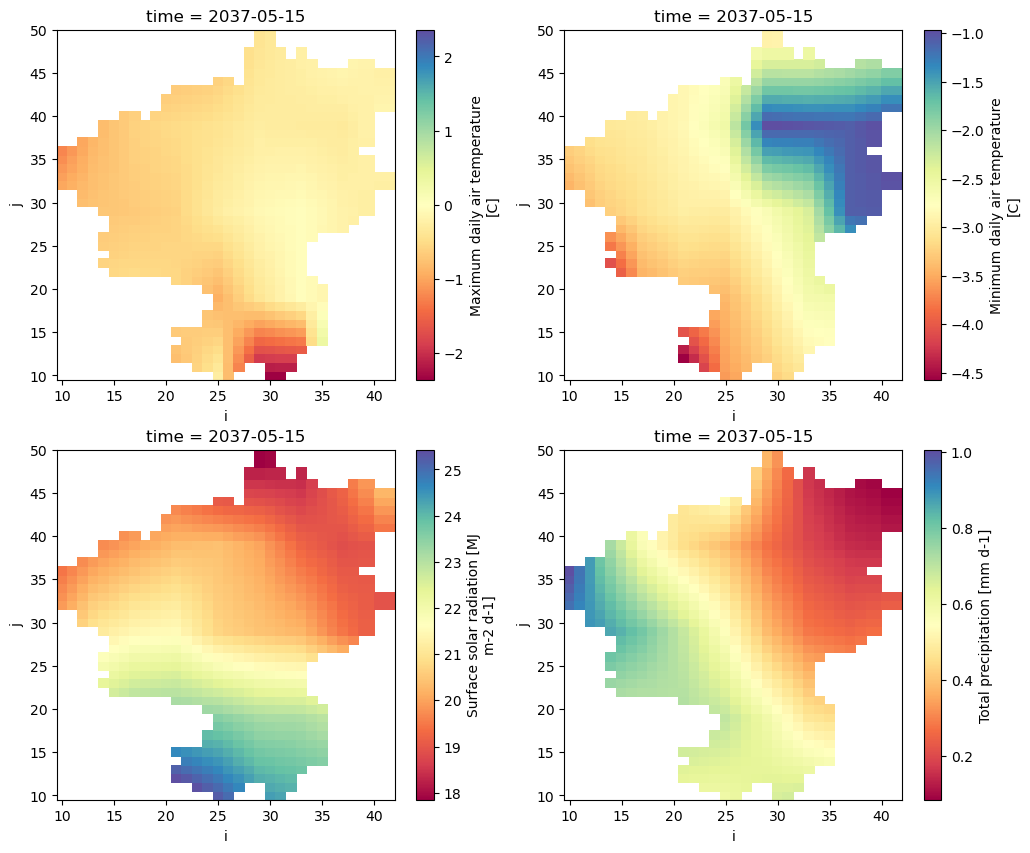

In [3]:
dsi= MeteoStations.interpolation("linear")
grid = MeteoStations.cequeau_grid(dsi)
dsi = dsi.isel(time=500)
fig, axes = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(12, 10))
dsi["tMax"].plot(ax=axes[0,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["tMin"].plot(ax=axes[0,1], cmap='Spectral')
dsi["rayonnement"].plot(ax=axes[1,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["pTot"].plot(ax=axes[1,1], cmap='Spectral')
# axes[1].set_title("Interpolated data")

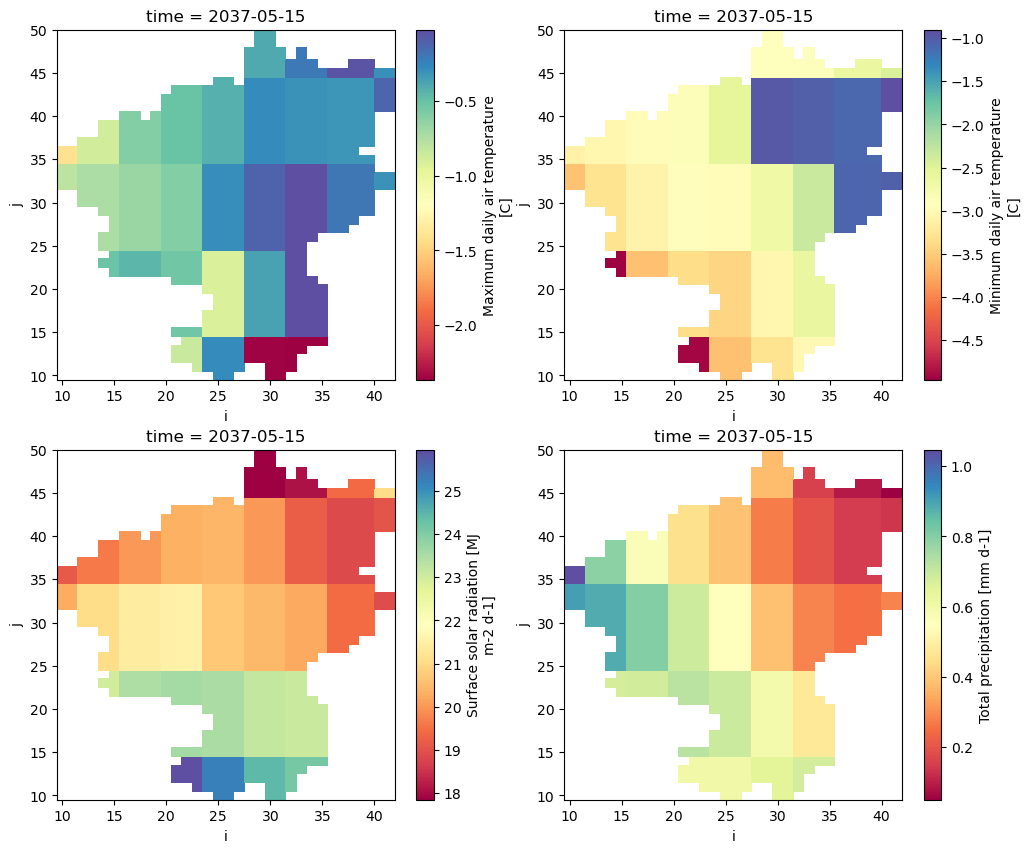

In [4]:
dsi= MeteoStations.interpolation("nearest")
grid = MeteoStations.cequeau_grid(dsi)
dsi = dsi.isel(time=500)
fig, axes = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(12, 10))
dsi["tMax"].plot(ax=axes[0,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["tMin"].plot(ax=axes[0,1], cmap='Spectral')
dsi["rayonnement"].plot(ax=axes[1,0], cmap='Spectral')
# axes[0].set_title("Raw data")
dsi["pTot"].plot(ax=axes[1,1], cmap='Spectral')